# The NIPS Experiment

### Corinna Cortes and Neil D. Lawrence

### 28th December 2014


## Introduction

In this notebook we perform some preliminary analysis on 'The NIPS Experiment'. This was an experiment to determine the consistency of the review process. After receiving papers we selected 10% that would be independently rereviewed. The idea was to determine how consistent the decisions between the two sets of independent papers would be. In 2014 NIPS received 1678 submissions and we selected 170 for the experiment. These papers are referred to below as 'duplicated papers'.

To run the experiment we created two separate committees within the NIPS program committee. The idea was that the two separate committees would review each duplicated paper independently and results compared.


## Results and Analysis

The final results of the experiment were as follows. From 170 papers 4 had to be withdrawn or were rejected without completing the review process, for the remainder, the 'confusion matrix' for the two committee's decisions is below.

<table>
  <tr>
  <td colspan="2"></td><td colspan="2">Committee 1</td>
  </tr>
  <tr>
  <td colspan="2"></td><td>Accept</td><td>Reject</td>
  </tr>
  <tr>
    <td rowspan="2">Committee 2</td><td>Accept</td><td>22</td><td>22</td>
  </tr>
  <tr>
    <td>Reject</td><td>21</td><td>101</td>
  </tr>
</table>

## Summarizing the Table

There are a few ways of summarizing the numbers in this table as percent or probabilities. First of all, the *inconsistency*, the proportion of decisions that were not the same across the two committees. The decisions were inconsistent for 43 out of 166 papers or 0.259 as a proportion.  This number is perhaps a natural way of summarizing the figures if you are submitting your paper and wish to know an estimate of what the probability is that your paper would have different decisons according to the different committes. Secondly, the *accept precision*: if you are attending the conference and looking at any given paper, then you might want to know the probability that the paper would have been rejected in an independent rerunning of the conference.  We can estimate this for Committee 1's conference as 22/(22 + 22) = 0.5 (50%) and for Committee 2's conference as 21/(22+21) = 0.49 (49%). Averaging the two estimates gives us 49.5%. Finally, the *reject precision*: if your paper was rejected from the conference, you might like an estimate of the probability that the same paper would be rejected again if the review process had been independently rerun. That estimate is 101/(22+101) = 0.82 (82%) for Committee 1 and 101/(21+101)=0.83 (83%) for Committee 2, or on average 82.5%. A final quality estimate might be the ratio of consistent accepts to consistent rejects, or the *agreed accept rate*, 22/123 = 0.18 (18%). 

### Aide Memoire

There seems to have been a lot of discussion of the result, both at the conference and on bulletin boards since. Such discussion is to be encouraged, and for ease of memory, it is worth pointing out that the approximate proportions of papers in each category can be nicely divided in to eigths as follows. Accept-Accept 1 in 8 papers, Accept-Reject 3 in 8 papers, Reject-Reject, 5 in 8 papers. This makes the statistics we've computed above: *inconsistency* 1 in 4 (25%) *accept precision* 1 in 2 (50%) *reject precision* 5 in 6 (83%) and *agreed accept rate* of 1 in 6 (20%). This compares with the accept rate of 1 in 4. 

### Sampling Error and Bias

Much of the discussion speculates on the number of consistent accepts in the process (using the main conference accept rate as a proxy). It therefore produces numbers that don't match ours above. This is because the computed accept rate of the individual committees is different from that of the main conference. This could be due to a bias for the duplicated papers, or statistical sampling error. We look at these questions below. First, to get the reader primed for thinking about these numbers we discuss some context for placing these numbers.

### Context: A Random Committee

The first context we can place around the numbers is what would have happened at the 'Random Conference' where we simply accept a quarter of papers at random. In this NIPS the expected numbers of accepts would then have been:
<table>
  <tr>
  <td colspan="2"></td><td colspan="2">Committee 1</td>
  </tr>
  <tr>
  <td colspan="2"></td><td>Accept</td><td>Reject</td>
  </tr>
  <tr>
    <td rowspan="2">Committee 2</td><td>Accept</td><td>10.4 (1 in 16)</td><td>31.1 (3 in 16)</td>
  </tr>
  <tr>
    <td>Reject</td><td>31.1 (3 in 16) </td><td>93.4 (9 in 16)</td>
  </tr>
</table>
And for this set up we would expect *inconsistency* of 3 in 8 (37.5%) *accept precision* of 1 in 4 (25%) and a *reject precision* of 3 in 4 (75%) and a *agreed accept rate* of 1 in 10 (10%). The actual committee made improvements on these numbers, in particular the accept precision was markedly better with 50%: twice as many consistent accept decisions were made than would be expected if the process had been performed at random and only around two thirds as many inconsistent decisions were made as would have been expected if decisions were made at random. However, we should treat all these figures with some skepticism until we've performed some estimate of the uncertainty associated with them. 

### Uncertainty

To get a handle on the uncertainty around these numbers we'll start by making use of the (binomial distribution)[http://en.wikipedia.org/wiki/Binomial_distribution]. First, let's explore the fact that for the overall conference the accept rate was around 23%, but for the duplication committees the accept rate was around 25%. If we assume decisions are made according to a binomial distribution, then is the accept rate for the duplicated papers too high?

Note that for all our accept probability statistics we used as a denominator the number of papers that were initially sent for review, rather than the number where a final decision was made by the program committee. These numbers are different because some papers are withdrawn before the program committee makes its decision. Most commonly this occurs after authors have seen their preliminary reviews: for NIPS 2014 we provided preliminary reviews that included paper scores. So for the official accept probability we use the 170 as denominator. The accept probabilities were therefore 43 out of 170 papers (25.3%) for Committee 1 and 44 out of 170 (25.8%) for Committee 2. This compares with the overall conference accept rate for papers outside the duplication process of 349 out of 1508 (23.1%). 

If the true underlying probability of an accept were actually 0.23 independent of the paper, then the probability of generating accepts for any subset of the papers would be given by a binomial distribution. Combining across the two committees for the duplicated papers, we see that 87 papers in total were recommended for accept out of a total of 340 trials. out of 166 trials would be given by a binomial distribution as depicted below.

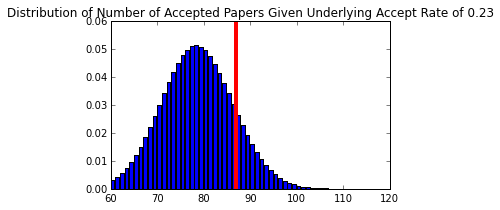

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
rv = binom(340, 0.23)
x = np.arange(60, 120)
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(x, rv.pmf(x))
ax.set_title('Distribution of Number of Accepted Papers Given Underlying Accept Rate of 0.23')
ax.axvline(87,linewidth=4, color='red') 
plt.show()
fig.savefig('accept-distribution.pdf')


From the plot, we can see that whilst the accept rate was slightly higher for duplicated papers it doesn't seem that we can say that it was statistically significant that it was higher, it falls well within the probability mass of the Binomial. 

Note that Area Chairs knew which papers were duplicates, whereas reviewers did not. Whilst we stipulated that duplicate papers should not be any given special treatment, we cannot discount the possibility that Area Chairs may have given slightly preferential treatment to duplicate papers. 

For the accept precision, if we assume that accept decisions were drawn according to a binomial, then the distribution for consistent accepts is also binomial. Our best estimate of its parameter is 22/166 = 0.13 (13%). If we had a binomial distribution with these parameters, then the distribution of consistent accepts would be as follows.

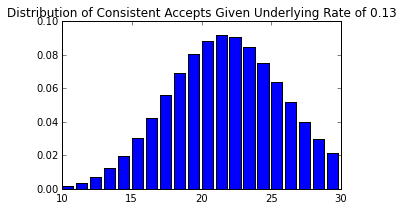

In [10]:
rv = binom(166, 0.13)
x = np.arange(10, 30)
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(x, rv.pmf(x))
ax.set_title('Distribution of Consistent Accepts Given Underlying Rate of 0.13')
plt.show()
fig.savefig('consistent-accept-distribution.pdf')

We see immediately that there is a lot of uncertainty around this number, for the scale of the experiment as we have it. This suggests a more complex analysis is required to extract our estimates with uncertainty.

## A Bayesian Analysis

Before we start the analysis, it's important to make some statements about the aims of our modelling here. We will make some simplifying modelling assumptions for the sake of a model that is understandable. In particular, we are looking to get a handle on the uncertainty associated with some of the probabilities associated with the NIPS experiment. [Some preliminary analyses have already been conducted on blogs](http://inverseprobability.com/2015/01/16/blogs-on-the-nips-experiment/). Those analyses don't have access to information like paper scores etc. For that reason we also leave out such information in this preliminary analysis. We will focus only on the summary results from the experiment: how many papers were consistently accepted, consistently rejected or had inconsistent decisions. For the moment we disregard the information we have about paper scores.

In our analysis there are three possible outcomes for each paper: consistent accept, inconsistent decision and consistent reject. So we need to perform the analysis with the [multinomial distribution](http://en.wikipedia.org/wiki/Multinomial_distribution). The multinomial is parameterized by the probabilities of the different outcomes. These are our parameters of interest, we would like to estimate these probabilities alongside their uncertainties. To make a Bayesian analysis we place a prior density over these probabilities, then we update the prior with the observed data, that gives us a posterior density, giving us an uncertainty associated with these probabilities. 

### Prior Density

Choice of prior for the multinomial is typically straightforward, the [Dirichlet density](http://en.wikipedia.org/wiki/Dirichlet_distribution) is [conjugate](http://en.wikipedia.org/wiki/Conjugate_prior) and has the additional advantage that its parameters can be set to ensure it is *uninformative*, i.e. uniform across the domain of the prior. Combination of a multinomial likelihood and a Dirichelt prior is not new, and in this domain if we were to consider the mean the posterior density only, then the approach is known as [Laplace smoothing](http://en.wikipedia.org/wiki/Additive_smoothing). 

For our model we are assuming for our prior that the probabilities are drawn from a Dirichlet as follows,
$$
p \sim \text{Dir}(\alpha_1, \alpha_2, \alpha_3),
$$
with $\alpha_1=\alpha_2=\alpha_3=1$. The Dirichlet density is conjugate to the [multinomial distribution](http://en.wikipedia.org/wiki/Multinomial_distribution), and we associate three different outcomes with the multinomial. For each of the 166 papers we expect to have a consistent accept (outcome 1), an inconsistent decision (outcome 2) or a consistent reject (outcome 3). If the counts four outcome 1, 2 and 3 are represented by $k_1$, $k_2$ and $k_3$ and the associated probabilities are given by $p_1$, $p_2$ and $p_3$ then our model is, 
\begin{align*}
\mathbf{p}|\boldsymbol{\alpha} \sim \text{Dir}(\boldsymbol{\alpha}) \\
\mathbf{k}|\mathbf{p} \sim \text{mult}(\mathbf{p}).
\end{align*}
Due to the conjugacy the posterior is tractable and easily computed as a Dirichlet (see e.g. [Gelman et al](http://www.stat.columbia.edu/~gelman/book/)), where the parameters of the Dirichlet are given by the original vector from the Dirichlet prior plus the counts associated with each outcome. 
$$
\mathbf{p}|\mathbf{k}, \boldsymbol{\alpha} \sim \text{Dir}(\boldsymbol{\alpha} + \mathbf{k})
$$
The mean probability for each outcome is then given by,
$$
\bar{p}_i = \frac{\alpha_i+k_i}{\sum_{j=1}^3(\alpha_j + k_j)}.
$$
and the variance is
$$
\mathrm{Var}[p_i] = \frac{(\alpha_i+k_i) (\alpha_0-\alpha_i + n + k_i)}{(\alpha_0+n)^2 (\alpha_0+n+1)},
$$
where $n$ is the number of trials (166 in our case) and $\alpha_0 = \sum_{i=1}^3\alpha_i$. This allows us to compute the expected value of the probabilities and their variances under the posterior as follows.

In [5]:
def posterior_mean_var(k, alpha):
    """Compute the mean and variance of the Dirichlet posterior."""
    alpha_0 = alpha.sum()
    n = k.sum()
    m = (k + alpha)
    m /= m.sum()
    v = (alpha+k)*(alpha_0 - alpha + n + k)/((alpha_0+n)**2*(alpha_0+n+1))
    return m, v
k = np.asarray([22, 43, 101])
alpha = np.ones((3,))
m, v = posterior_mean_var(k, alpha)
outcome = ['consistent accept', 'inconsistent decision', 'consistent reject']
for i in range(3):
    print "Probability of", outcome[i], m[i], "+/-", np.sqrt(v[i])


Probability of consistent accept 0.136094674556 +/- 0.030000573243
Probability of inconsistent decision 0.260355029586 +/- 0.043727676416
Probability of consistent reject 0.603550295858 +/- 0.0751735501215


So we have a probability of consistent accept as $0.136 \pm 0.06$, the probability of inconsistent decision as $0.260 \pm 0.09$ and probability of consistent reject as $0.60 \pm 0.15$. Recall that if we'd selected papers at random (with accept rate of 1 in 4) then these values would have been 1 in 16 (0.0625), 3 in 8 (0.375) and 9 in 16 (0.5625). 

The other values we are interested in are the accept precision, reject precision and the agreed accept rate. Computing the probability density for these statistics is complex, because it involves [Ratio Distributions](http://en.wikipedia.org/wiki/Ratio_distribution). However, we can use Monte Carlo to estimate the expected accept precision, reject precision and agreed accept rate as well as their variances. We can use these results to give us error bars and histograms of these statistics.

In [6]:
def sample_precisions(k, alpha, num_samps):
    """Helper function to sample from the posterior distibution of accept, 
    reject and inconsistent probabilities and compute other statistics of interest 
    from the samples."""

    k = np.random.dirichlet(k+alpha, size=num_samps)
    # Factors of 2 appear because inconsistent decisions 
    # are being accounted for across both committees.
    ap = 2*k[:, 0]/(2*k[:, 0]+k[:, 1])
    rp = 2*k[:, 2]/(k[:, 1]+2*k[:, 2])
    aa = k[:, 0]/(k[:, 0]+k[:, 2])
    return ap, rp, aa

ap, rp, aa = sample_precisions(k, alpha, 10000)
print('accept precision', ap.mean(), '+/-', np.sqrt(ap.var()))
print('reject precision', rp.mean(), '+/-', np.sqrt(rp.var()))
print('agreed accept rate', aa.mean(), '+/-', np.sqrt(aa.var()))


('accept precision', 0.50886002417529463, '+/-', 0.063044476196256236)
('reject precision', 0.82181227477717478, '+/-', 0.026924721684648583)
('agreed accept rate', 0.18434956618812384, '+/-', 0.034221145810294049)


Giving an accept precision of $0.51 \pm 0.13$, a reject precision of $0.82 \pm 0.05$ and an agreed accept rate of $0.18 \pm 0.07$. Note that the 'random conference' values of 1 in 4 for accept precision and 3 in 4 for reject decisions are outside the two standard deviation error bars. If it is preferred medians and percentiles could also be computed from the samples above, but as we will see when we histogram the results the densities look broadly symmetric, so this is unlikely to have much effect.

#### Histogram of Monte Carlo Results

Just to ensure that the error bars are reflective of the underlying densities we histogram the Monte Carlo results for accept precision, reject precision and agreed accept below. Shown on each histogram is a line representing the result we would get for the 'random committee'.

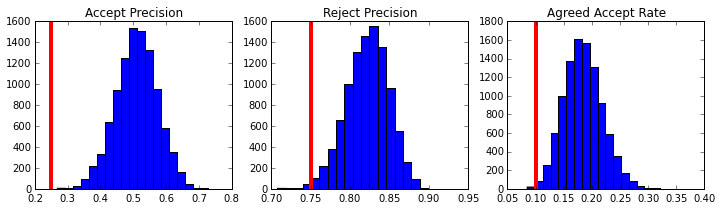

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
_ = ax[0].hist(ap, 20)
_ = ax[0].set_title('Accept Precision')
ax[0].axvline(0.25, linewidth=4, color='r')
_ = ax[1].hist(rp, 20)
_ = ax[1].set_title('Reject Precision')
ax[1].axvline(0.75, linewidth=4, color='r')
_ = ax[2].hist(aa, 20)
_ = ax[2].set_title('Agreed Accept Rate')
ax[2].axvline(0.10, linewidth=4, color='r')
fig.savefig('ratio-distributions.pdf')

#### Model Choice and Prior Values

In the analysis above we've minimized the modeling choices: we made use of a Bayesian analysis to capture the uncertainty in counts that can be arising from statistical sampling error. To this end we chose an uninformative prior over these probabilities. However, one might argue that the prior should reflect something more about the underlying experimental structure: for example we *know* that if the committees made their decisions independently it is unlikely that we'd obtain an inconsistency figure much greater than 37.5% because that would require committees to explicitly collude to make inconsistent decisions: the random conference is the worst case. Due to the accept rate, we also expect a larger number of reject decisions than reject. This also isn't captured in our prior. Such questions actually move us into the realms of modeling the process, rather then performing a sensitivity analysis. However, if we wish to model the decision process as a whole we have a lot more information available, and we should make use of it. The analysis above is intended to exploit our randomized experiment to explore how inconsistent we expect two committees to be. It focusses on that single question, it doesn't attempt to give answers on what the reasons for that inconsistency are and how it may be reduced. The additional maths was needed only to give a sense of the uncertainty in the figures. That uncertainty arises due to the limited number of papers in the experiment.

### Initial Conclusions

Under the simple model we have outlined, we can be confident that there is inconsistency between two independent committees, but the level of inconsistency is much less than we would find for a random committee. If we accept that the bias introduced by the Area Chairs knowing when they were dealing with duplicates was minimal, then if we were to revisit the NIPS 2014 conference with an independent committee then we would expect between **38% and 64% of the presented papers to be the same**. If the conference was run at random, then we would only expect 25% of the papers to be the same.

It's apparent from comments and speculation about what these results mean, that some people might be surprised by the size of this figure. However, it only requires a little thought to see that this figure is likely to be large for any highly selective conference if there is even a small amount of inconsistency in the decision making process. This is because once the conference has chosen to be 'highly selective' then because by definition only a small percentage of papers are to be accepted. Now if we think of a type I error as accepting a paper which should be rejected, such errors are easier to make because by definition many more papers should be rejected. Type II errors (rejecting a paper that should be accepted) are less likely becaue (by setting the accept rate low) there are fewer papers that should be accepted in the first place. When there is a difference of opinion between reviewers, it does seem that many of the arugments can be distilled down to (a subjective opinion) about whether controlling for type I or type II errors is more important. Further, normally when discussing type I and type II errors we believe that the underlying system of study is genuinely binary: e.g. diseased or not diseased. However, for conferences the accept/reject boundary is not a clear separation point, there is a continuum (or spectrum) of paper quality (as there also is for some diseases). And the decision boundary often falls in a region of very high density. To better quantify these ideas we can explore our duplication experiment in more detail, by introducing the paper scores, that's a task we will perform in a fresh notebook.